In [2]:
%matplotlib widget
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
from importlib import reload

src = str(Path('../src').resolve())
if src not in sys.path:
    sys.path.append(src)

from evaluate import *

In [5]:
# Compare multitarget training
exp_dict = {
    'pretrain': Path("../runs/hybrid_multitarget_0.5d_064_030/6_head_6_layer_all_sat_all_target_20240620_150312"),
    'finetune': Path("../runs/hybrid_multitarget_0.5d_064_030/6_head_6_layer_all_sat_all_target_20240620_150312/flux_finetune_20240626_131838")
}
            

exp_names = []
results = []
bulk_metrics = []
basin_metrics = []
for exp_name, exp_dir in exp_dict.items():
    exp_names.append(exp_name)
    with open(exp_dir / "test_data.pkl", 'rb') as f:
        r, bulk_m, basin_m = pickle.load(f)
        results.append(r)
        bulk_metrics.append(bulk_m)
        basin_metrics.append(basin_m)
        
        
# multitarget_joint_idx = exp2_metrics.index.intersection(exp1_metrics.index)
# exp1_metrics = exp1_metrics.loc[multitarget_joint_idx]
# exp2_metrics = exp2_metrics.loc[multitarget_joint_idx]

In [11]:
m

Feature                  ssc                                             \
Metric               num_obs        R2         MAPE     nBias        RE   
USGS-01015000             21  0.924208     0.520785 -0.007282  0.714495   
USGS-01017100             25 -2.477209     0.710504 -0.585053  0.542252   
USGS-01021050             69  0.005952     0.893156  0.162288  0.677282   
USGS-01036390             66 -0.018446     0.723177  0.582607  0.850717   
USGS-01049265             94  0.702465     0.856166   0.05624  0.630172   
...                      ...       ...          ...       ...       ...   
USGS-14372300             84 -2.073701     0.499511 -0.341187  0.386858   
USGS-322023090544500      77  0.066433     0.512381 -0.262149  0.389873   
USGS-383103106594200      53  0.718897  117741696.0 -0.096628  0.436531   
USGS-394220106431500      83   0.41373     0.738339  0.261339  0.676783   
USGS-402840107004200      15  0.656575     1.493846 -0.591397  0.854384   

Feature                                                                      \
Metric                      RMSE       rRMSE       KGE        NSE Agreement   
USGS-01015000            9.67921   59.004062   0.79894     0.9474  0.968949   
USGS-01017100          20.951448  200.263596 -0.863639   0.546462  0.604188   
USGS-01021050           4.933123   90.297717  0.019389  -5.891905   0.16467   
USGS-01036390          45.622974  743.793344  -0.37353 -89.698212  0.027372   
USGS-01049265           6.772449   94.342935  0.787181    0.60879  0.831113   
...                          ...         ...       ...        ...       ...   
USGS-14372300           66.86348  301.054573 -0.647317   0.548496  0.607427   
USGS-322023090544500  100.709976     44.7945  0.471898  -0.362971  0.504913   
USGS-383103106594200   28.477917   91.214263   0.74011   0.572367  0.830658   
USGS-394220106431500   35.313023  144.343591  0.482852  -0.200231   0.61523   
USGS-402840107004200   16.199181    61.31922  0.262631   0.834449  0.892699   

Feature               ...  usgs_q                                          \
Metric                ... num_obs        R2      MAPE     nBias        RE   
USGS-01015000         ...       0       NaN       NaN       NaN       NaN   
USGS-01017100         ...       0       NaN       NaN       NaN       NaN   
USGS-01021050         ...       0       NaN       NaN       NaN       NaN   
USGS-01036390         ...       0       NaN       NaN       NaN       NaN   
USGS-01049265         ...       0       NaN       NaN       NaN       NaN   
...                   ...     ...       ...       ...       ...       ...   
USGS-14372300         ...       0       NaN       NaN       NaN       NaN   
USGS-322023090544500  ...       0       NaN       NaN       NaN       NaN   
USGS-383103106594200  ...       0       NaN       NaN       NaN       NaN   
USGS-394220106431500  ...      44  0.690705  0.323448  0.268501  0.427495   
USGS-402840107004200  ...       0       NaN       NaN       NaN       NaN   

Feature                                                                    
Metric                     RMSE       rRMSE       KGE       NSE Agreement  
USGS-01015000               NaN         NaN       NaN       NaN       NaN  
USGS-01017100               NaN         NaN       NaN       NaN       NaN  
USGS-01021050               NaN         NaN       NaN       NaN       NaN  
USGS-01036390               NaN         NaN       NaN       NaN       NaN  
USGS-01049265               NaN         NaN       NaN       NaN       NaN  
...                         ...         ...       ...       ...       ...  
USGS-14372300               NaN         NaN       NaN       NaN       NaN  
USGS-322023090544500        NaN         NaN       NaN       NaN       NaN  
USGS-383103106594200        NaN         NaN       NaN       NaN       NaN  
USGS-394220106431500  10.142935  102.229178  0.518193  0.173973  0.781311  
USGS-402840107004200        NaN         NaN       NaN       NaN       NaN  

[576 

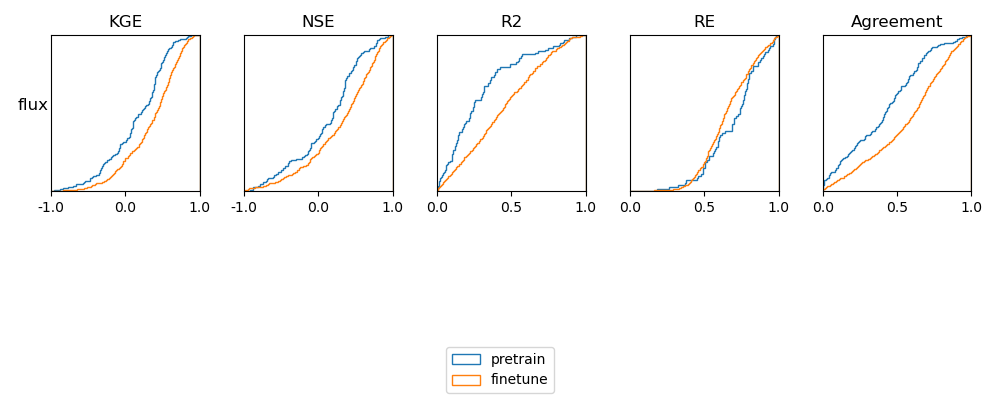

In [14]:
plt.close('all')

features = bulk_metrics[0].keys()

metric_args = {
    'KGE':{'range':[-1,1]},
    'NSE':{'range':[-1,1]},
    'R2':{'range':[0,1]},
    'RE':{'range':[0,1]},
    'Agreement':{'range':[0,1]}}
common_args = {
    'bins': 500,
    'cumulative': True, 
    'density': True,
    'histtype': 'step'}

features = ['flux']
nRows = len(features)+1 #Extra row for legend
nCols = len(metric_args)
fig, axes = plt.subplots(nRows, nCols, figsize=(2*nCols,2*nRows))

    
for feature, axes_row in zip(features, axes[:-1]):
    for (metric, metric_kwargs), ax in zip(metric_args.items(), axes_row):
        for m in basin_metrics:
            x = m[feature, metric].astype(float)
            x = x[np.isfinite(x)]
            ax.hist(x, **common_args, **metric_kwargs)
        
        ax.set_aspect(1./ax.get_data_ratio())
        ax.set_xlim(metric_kwargs['range'])
        ax.set_ylim([0,1])
        # ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        
for (metric, _), ax in zip(metric_args.items(), axes[0,:]):
    ax.set_title(metric)
    
for feature, ax in zip(features, axes[:-1,0]):
    ax.set_ylabel(feature, rotation=0, ha='right', fontsize='large', labelpad=2)

for ax in axes[-2,:]:
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 3))
    ax.set_xticklabels(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 3))

for ax in axes[-1,:]:
    ax.set_axis_off()
    
fig.legend(exp_names, loc='lower center')

fig.tight_layout()

In [7]:
from train import load_last_state
from data import TAPDataset, TAPDataLoader
from evaluate import predict

# basin = 'USGS-09367540'
# basin = 'USGS-06109500' #no flux but nice seasonality
basin = 'USGS-08332010' #Nice flux temporal distribution and seasonality


exp_preds = []
for exp_dir in exp_dirs:
    cfg, model, trainer_state, opt_state, _ = load_last_state(exp_dir)
    cfg['quiet'] = False
    cfg['data_subset'] = 'predict'
    cfg['basin_subset'] =  basin
    cfg['num_workers'] = 0 # Faster for small runs
    
    dataset = TAPDataset(cfg)
    dataloader = TAPDataLoader(cfg, dataset)
    preds = predict(model, dataloader, seed=0, denormalize=True, return_dt=True)
    preds['pred'] = preds['pred'] * (preds['pred']>0) #Clip preds to 0

    preds = preds.reset_index()
    preds = preds.sort_values(by='date')
    preds = preds.drop('basin', axis=1, level=0)
    preds.set_index('date', inplace=True)
    
    exp_preds.append(preds)

Loading model state from ../runs/hybrid_multitarget_0.5d_064_030/6_head_6_layer_all_sat_all_target_20240620_150312/epoch050


2024-06-26 16:30:41.035694: W external/xla/xla/service/gpu/nvptx_compiler.cc:718] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Dropping static attributes with 0 variance: ['glc_pc_s03', 'glc_pc_s05', 'glc_pc_s07', 'glc_pc_s08', 'glc_pc_s17', 'glc_pc_s19', 'pnv_pc_s03', 'wet_pc_s05', 'wet_pc_s06', 'wet_pc_s07']
Data Hash: 719df90bdda260a92eeef8b241e060603679309e0ccec665d70790b8934ed617
Using cached basin dataset file.


Updating Indices:   0%|          | 0/740 [00:00<?, ?it/s]

Dataloader using 0 parallel CPU worker(s).
Batch sharding set to 1 gpu(s)


  0%|          | 0/51 [00:00<?, ?it/s]

Loading model state from ../runs/hybrid_multitarget_0.5d_064_030/6_head_6_layer_all_sat_all_target_20240620_150312/flux_finetune_20240626_131838/epoch100
Dropping static attributes with 0 variance: ['glc_pc_s03', 'glc_pc_s05', 'glc_pc_s07', 'glc_pc_s08', 'glc_pc_s17', 'glc_pc_s19', 'pnv_pc_s03', 'wet_pc_s05', 'wet_pc_s06', 'wet_pc_s07']
Data Hash: d28a6aa641844d0a53281c7971902c1fc36487e13d6b3a8136a1af4cc2ede512
Using cached basin dataset file.


Updating Indices:   0%|          | 0/740 [00:00<?, ?it/s]

Dataloader using 0 parallel CPU worker(s).
Batch sharding set to 1 gpu(s)


  0%|          | 0/51 [00:00<?, ?it/s]

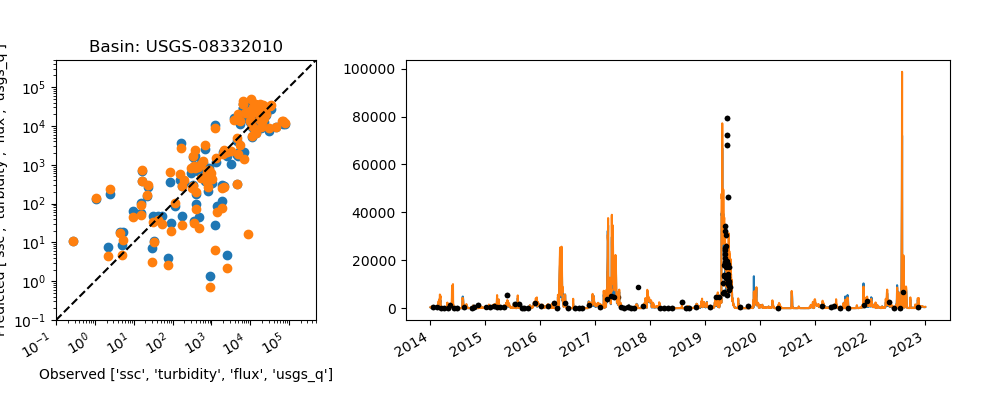

In [8]:
import matplotlib.gridspec as gridspec

# Plot the true values and predictions
plt.close('all')

# Create a figure
fig = plt.figure(figsize=(10, 4))

# Create a GridSpec with 1 row and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.2, 2])
axes = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 2])]


min_val = 1E-1
max_val = 5E5

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for preds, color in zip(exp_preds, colors):
    pred = preds['pred']['flux']
    obs = preds['obs']['flux']
    axes[0].scatter(obs, pred, color=color)

    axes[1].plot(pred, color=color)
    axes[1].plot(obs, linestyle='None',marker='.',color='k')

axes[0].plot([min_val, max_val], [min_val, max_val], 'k--')

# Setting axes to be square and equal range
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].axis('square')
axes[0].set_xlim(min_val, max_val)
axes[0].set_ylim(min_val, max_val)
axes[0].set_xlabel(f"Observed {cfg['features']['target']}")
axes[0].set_ylabel(f"Predicted {cfg['features']['target']}")
axes[0].set_title(f"Basin: {basin}")

# axes[1].set_ylim([0,40000])


fig.subplots_adjust(top=0.85, left=0.05, right=0.95, wspace=0.05, hspace=0.4)
# fig.suptitle(str(run_dir))
fig.autofmt_xdate()

plt.show()

# fig.savefig(run_dir / f"{basin}_timeseries.png",  dpi=300)

In [201]:


colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']